In [136]:
using DataFrames, CSV, PyPlot, FITSIO, FITSTables, Statistics, PyCall
LogNorm = pyimport("matplotlib.colors").LogNorm
include("bin.jl");

In [23]:
df = FITS(DataFrame ∘ last, "random_30000_test.classified.fits");

In [27]:
lamostxgaia = FITS(DataFrame ∘ last, "../cats/LAMOST-dr5v3-designations-coords-gaia.fits");

In [28]:
df = join(df, lamostxgaia, on=:designation);

In [109]:
df.flagged = df.isline .& (df.EEW .> 0.2) .& (df.EEW_err .< 0.2/3);
df.couldflag = df.EEW_err .< 0.2/3;

In [89]:
α = df.ra
δ = df.dec
r = hcat((cos.(α) .* cos.(δ)),
             (sin.(α) .* cos.(δ)),
             (sin.(δ)))
A = [0.0548755604162154 +0.4941094278755837 -0.8676661490190047
              -0.8734370902348850 -0.4448296299600112 -0.1980763734312015
              -0.4838350155487132 +0.7469822444972189 +0.4559837761750669]
rGal = df.rest .* (r * A)
;

In [90]:
mask = .! any(isnan.(rGal), dims=2)[:]
rGal = rGal[mask, :]
df = df[mask, :]
;

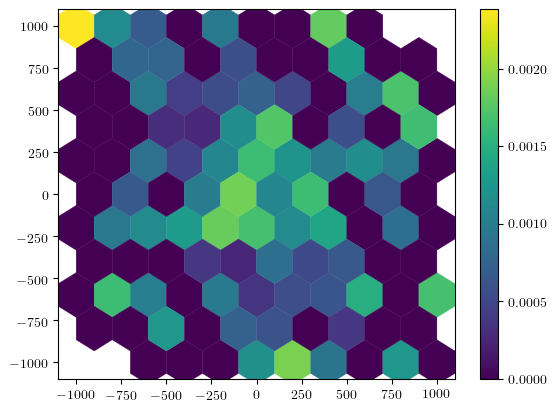

PyObject <matplotlib.colorbar.Colorbar object at 0x2568d03c8>

In [166]:
censoredmean(f) = length(f) > 300 ? mean(f) : NaN
mask = df.couldflag .& (df.logg .> 3)
hexbin(rGal[mask, 1], rGal[mask, 2], C=df.flagged[mask], gridsize=10, 
       reduce_C_function=censoredmean, linewidths=(0.25,), extent=[-1000,1000,-1000,1000])
colorbar()

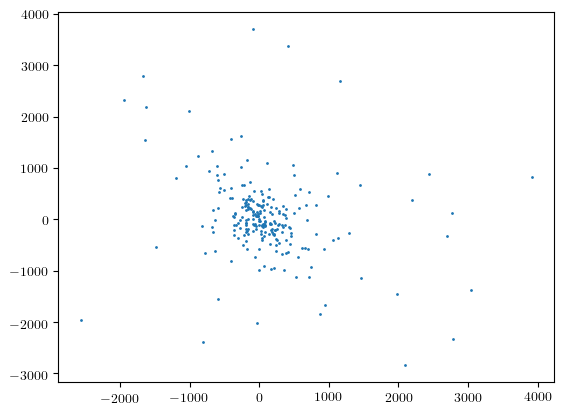

PyObject <matplotlib.collections.PathCollection object at 0x1cdf4e3c8>

In [168]:
mask = df.couldflag .& (df.logg .> 3) .& df.flagged
scatter(rGal[mask, 1], rGal[mask, 2], s=1)


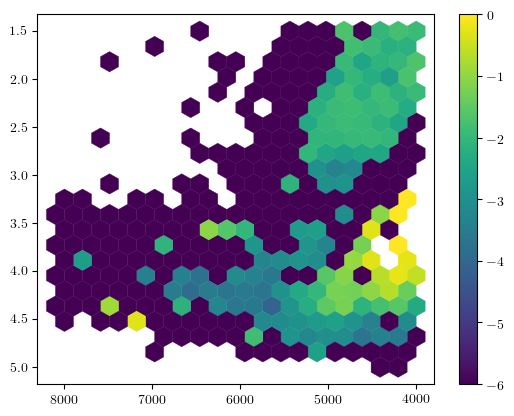

In [160]:
censoredmean(f) = log10(mean(f))# length(f) > 300 ? log10(mean(f)) : NaN
hexbin(df.teff[df.couldflag], df.logg[df.couldflag], C=df.flagged[df.couldflag], gridsize=20, 
       reduce_C_function=censoredmean, linewidths=(0.25,), extent=[4000,8100,1.5,5], vmin=-6)
colorbar()
gca().invert_xaxis()
gca().invert_yaxis()